1.

Cuatro bloques de masas diferentes mi están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo θ, donde los coeficientes de fricción entre los bloques y el plano son μ_i. Las ecuaciones de movimiento para el sistema son:

$$
T_1+m_1a=m_1g(sinθ−μ_1cosθ)
−T_1+T_2+m_2a=m_2g(sinθ−μ_2cosθ)
−T_2+T_3+m_3a=m_3g(sinθ−μ_3cosθ)
−T_3+m_4a=−m_4g
$$
donde:
T_i representan las tensiones en las cuerdas a es la aceleración del sistema
θ=45∘ es el ángulo de inclinación g=9.81m/s2 es la aceleración gravitatoria
Determine a y T_i
Datos:

Masas de los bloques:
m=[10 4 5 6]^T kg

Coeficientes de fricción:
μ=[0.25 0.3 0.2]^T

In [2]:
import numpy as np

# Datos del problema
m = np.array([10, 4, 5, 6], dtype=float)   # masas
mu = np.array([0.25, 0.3, 0.2], dtype=float) # coef. fricción (solo para los 3 primeros)
theta = np.radians(45)  # conversión a radianes
g = 9.81  # gravedad

# Matriz A según el sistema planteado
A = np.array([
    [1, 0, 0, m[0]],
    [-1, 1, 0, m[1]],
    [0, -1, 1, m[2]],
    [0, 0, -1, m[3]]
], dtype=float)

# Vector b
b = np.array([
    m[0] * g * (np.sin(theta) - mu[0] * np.cos(theta)),
    m[1] * g * (np.sin(theta) - mu[1] * np.cos(theta)),
    m[2] * g * (np.sin(theta) - mu[2] * np.cos(theta)),
    - m[3] * g
], dtype=float)

# Resolver el sistema Ax = b
x = np.linalg.solve(A, b)

# Resultados
T1, T2, T3, a = x
print(f"T1 = {T1:.4f} N")
print(f"T2 = {T2:.4f} N")
print(f"T3 = {T3:.4f} N")
print(f"a  = {a:.4f} m/s²")

T1 = 35.8914 N
T2 = 48.8606 N
T3 = 68.5404 N
a  = 1.6134 m/s²


2.

Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, i_12, i_23 y asi sucesivamente.


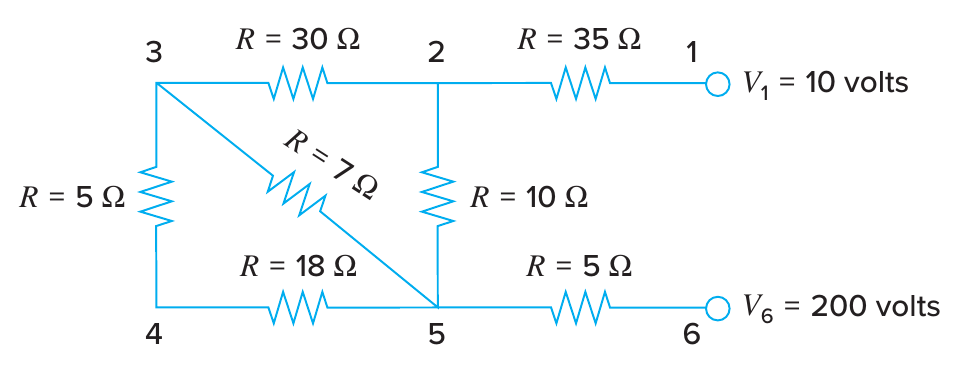


In [3]:
# ---------- Datos ----------
# Tensiones conocidas
V1 = 10.0       # V en nodo 1
V6 = 200.0      # V en nodo 6

# Resistencias (Ω)
R12 = 35.0
R23 = 30.0
R34 = 5.0
R45 = 18.0
R56 = 5.0
R35 = 7.0
R25 = 10.0

# Lista de nodos desconocidos: [V2, V3, V4, V5]
# ---------- Construcción de la matriz A y vector b ----------
# Conductancias
G12 = 1.0 / R12
G23 = 1.0 / R23
G34 = 1.0 / R34
G45 = 1.0 / R45
G56 = 1.0 / R56
G35 = 1.0 / R35
G25 = 1.0 / R25

# Matriz 4x4 para V2,V3,V4,V5
A = np.zeros((4,4), dtype=float)
b = np.zeros(4, dtype=float)

# Ecuación nodo 2: (V2-V1)/R12 + (V2-V3)/R23 + (V2-V5)/R25 = 0
A[0,0] = G12 + G23 + G25    # coef V2
A[0,1] = -G23               # coef V3
A[0,2] = 0.0                # coef V4
A[0,3] = -G25               # coef V5
b[0]    = G12 * V1          # término por V1 conocido (se pasa a RHS)

# Ecuación nodo 3: (V3-V2)/R23 + (V3-V4)/R34 + (V3-V5)/R35 = 0
A[1,0] = -G23
A[1,1] = G23 + G34 + G35
A[1,2] = -G34
A[1,3] = -G35
b[1]    = 0.0               # no hay tensión conocida conectada directamente

# Ecuación nodo 4: (V4-V3)/R34 + (V4-V5)/R45 = 0
A[2,0] = 0.0
A[2,1] = -G34
A[2,2] = G34 + G45
A[2,3] = -G45
b[2]    = 0.0

# Ecuación nodo 5: (V5-V2)/R25 + (V5-V3)/R35 + (V5-V4)/R45 + (V5-V6)/R56 = 0
A[3,0] = -G25
A[3,1] = -G35
A[3,2] = -G45
A[3,3] = G25 + G35 + G45 + G56
b[3]    = G56 * V6   # término por V6 conocido (pasa a RHS)

# ---------- Resolución del sistema ----------
V_unknown = np.linalg.solve(A, b)
V2, V3, V4, V5 = V_unknown

print("Nodos (solución):")
print(f"V2 = {V2:.6f} V")
print(f"V3 = {V3:.6f} V")
print(f"V4 = {V4:.6f} V")
print(f"V5 = {V5:.6f} V")

# ---------- Cálculo de corrientes (por la ley de Ohm) ----------
# Definimos corrientes i_ij como corriente desde i hacia j:
def i_ij(Vi, Vj, Rij):
    return (Vi - Vj) / Rij

# i12: corriente 1 -> 2 (positiva si va de 1 a 2)
i12 = i_ij(V1, V2, R12)
i23 = i_ij(V2, V3, R23)   # 2 -> 3
i34 = i_ij(V3, V4, R34)   # 3 -> 4
i45 = i_ij(V4, V5, R45)   # 4 -> 5
i56 = i_ij(V5, V6, R56)   # 5 -> 6
i35 = i_ij(V3, V5, R35)   # 3 -> 5 (diagonal)
i25 = i_ij(V2, V5, R25)   # 2 -> 5 (vertical)

print("\nCorrientes (convención i_ij = corriente i->j):")
print(f"i12 = {i12:.6f} A")
print(f"i23 = {i23:.6f} A")
print(f"i34 = {i34:.6f} A")
print(f"i45 = {i45:.6f} A")
print(f"i56 = {i56:.6f} A")
print(f"i35 = {i35:.6f} A")
print(f"i25 = {i25:.6f} A")

Nodos (solución):
V2 = 149.133743 V
V3 = 175.421214 V
V4 = 176.443505 V
V5 = 180.123751 V

Corrientes (convención i_ij = corriente i->j):
i12 = -3.975250 A
i23 = -0.876249 A
i34 = -0.204458 A
i45 = -0.204458 A
i56 = -3.975250 A
i35 = -0.671791 A
i25 = -3.099001 A


3.

Se sabe que un sistema físico es gobernado por las ecuaciones,

x′=2x-y+z

y′=3y-z

z′=2x+y+3z

donde x′,y′,z′ son las derivadas, en forma vectorial esto se puede representar como r′=Ar que tiene solución analítica general, r=e^(At) r(0).

Realice la diagonalización de A.

Use el hecho de que f(A)=Uf(D)U^−1 para encontrar x(t),y(t),z(t)
 en el intervalo de tiempo [0,2].

Grafique x(t),y(t),z(t) (use la condición inicial r(0)=(1,1,2)).

Compare el resultado a la solución analítica,
$$
2x=x(0)(e^(2t)(1+e^(2t)−2t))+y(0)(−2te^(2t))+z(0)(e^(2t)(−1+e^(2t))),
2y=x(0)(−e^(2t)(−1+e^(2t)−2t))+y(0)(2(t+1)e^(2t))+z(0)(−e^(2t)(−1+e^(2t))),
2z=x(0)(e^(2t)(−1+e^(2t)+2t))+y(0)(2te^(2t))+z(0)(e^(2t)(1+e^(2t))).
$$


Autovalores (λ): [4.+0.00000000e+00j 2.+1.68652966e-08j 2.-1.68652966e-08j]
Autovectores (columnas de U):
 [[-0.57735027+0.00000000e+00j -0.57735027+9.73718355e-09j
  -0.57735027-9.73718355e-09j]
 [ 0.57735027+0.00000000e+00j  0.57735027+0.00000000e+00j
   0.57735027-0.00000000e+00j]
 [-0.57735027+0.00000000e+00j  0.57735027-9.73718355e-09j
   0.57735027+9.73718355e-09j]]


/tmp/ipython-input-4057913653.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  rt_diag[i, :] = expAt @ r0


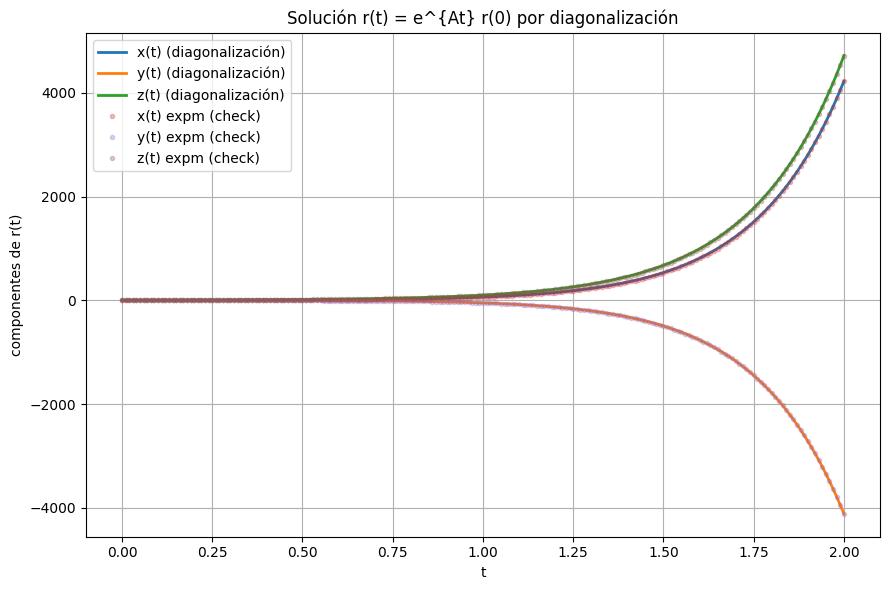

Máxima diferencia absoluta entre diag. y expm en la malla: 4.648e-09
Máxima diferencia absoluta entre solución (diagonalización) y fórmula dada: 3.547e-11

t = 0.0
  r(t) por diagonalización: [1. 1. 2.]
  r(t) por expresión dada:   [1. 1. 2.]
  diferencia (abs):          [4.4408921e-16 0.0000000e+00 0.0000000e+00]

t = 2.0
  r(t) por diagonalización: [ 4225.74530541 -4116.54900535  4717.12865571]
  r(t) por expresión dada:   [ 4225.74530541 -4116.54900535  4717.12865571]
  diferencia (abs):          [2.91038305e-11 3.09228199e-11 3.54702934e-11]


In [4]:
import matplotlib.pyplot as plt
from scipy.linalg import eig, inv, expm

# --- Definición de A y condición inicial ---
A = np.array([[2.0, -1.0, 1.0],
              [0.0,  3.0, -1.0],
              [2.0,  1.0,  3.0]])
r0 = np.array([1.0, 1.0, 2.0])

# --- Diagonalización: autovalores y autovectores ---
eigvals, eigvecs = eig(A)       # eigvals: autovalores, eigvecs: columnas son autovectores
# Comprobación: A @ eigvecs[:,i] ≈ eigvals[i] * eigvecs[:,i]
U = eigvecs
D = np.diag(eigvals)
Uinv = inv(U)

print("Autovalores (λ):", eigvals)
print("Autovectores (columnas de U):\n", U)

# --- Función que construye e^{A t} por diagonalización ---
def expAt_by_diagonalization(t):
    # e^{Dt} es diagonal con elementos exp(lambda_i * t)
    expDt = np.diag(np.exp(eigvals * t))
    # e^{A t} = U exp(D t) U^{-1}
    return U @ expDt @ Uinv

# --- Tiempo y evaluación de r(t) ---
ts = np.linspace(0, 2, 201)  # 201 puntos entre 0 y 2
rt_diag = np.zeros((len(ts), 3), dtype=float)   # para guardar soluciones por diagonalización
rt_expm = np.zeros_like(rt_diag)                # para guardar soluciones por expm (verificación)

for i, t in enumerate(ts):
    expAt = expAt_by_diagonalization(t)
    rt_diag[i, :] = expAt @ r0

    # verificación con expm
    rt_expm[i, :] = expm(A * t) @ r0

# --- Ploteo ---
plt.figure(figsize=(9,6))
plt.plot(ts, rt_diag[:,0], label='x(t) (diagonalización)', lw=2)
plt.plot(ts, rt_diag[:,1], label='y(t) (diagonalización)', lw=2)
plt.plot(ts, rt_diag[:,2], label='z(t) (diagonalización)', lw=2)

# superpongo la solución por expm (debe coincidir)
plt.plot(ts, rt_expm[:,0], 'o', ms=3, alpha=0.3, label='x(t) expm (check)')
plt.plot(ts, rt_expm[:,1], 'o', ms=3, alpha=0.3, label='y(t) expm (check)')
plt.plot(ts, rt_expm[:,2], 'o', ms=3, alpha=0.3, label='z(t) expm (check)')

plt.xlabel('t')
plt.ylabel('componentes de r(t)')
plt.title('Solución r(t) = e^{At} r(0) por diagonalización')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Comparación numérica entre diagonalización y expm ---
max_diff = np.max(np.abs(rt_diag - rt_expm))
print(f"Máxima diferencia absoluta entre diag. y expm en la malla: {max_diff:.3e}")

# --- Comparación con las expresiones "analíticas" dadas (interpreto las fórmulas como 2x = ...,
#     así que evaluamos RHS y dividimos por 2 para obtener x, y, z) -- ajustar si tu intención difiere.
x0, y0, z0 = r0

def analytic_rhs(ts):
    # las expresiones del enunciado (las pongo como estan ahi y luego se divide por 2)
    e2t = np.exp(2*ts)
    # según el enunciado:
    # 2x = x0 * ( e^{2t} (1 + e^{2t} - 2t) ) + y0 * (-2 t e^{2t}) + z0 * ( e^{2t} (-1 + e^{2t}) )
    X_rhs = x0 * ( e2t * (1 + e2t - 2*ts) ) + y0 * (-2 * ts * e2t) + z0 * ( e2t * (-1 + e2t) )
    x_analytic = X_rhs / 2.0

    # 2y = x0*( - e^{2t}(-1 + e^{2t} - 2t) ) + y0*( 2 (t+1) e^{2t} ) + z0*( - e^{2t}(-1 + e^{2t}) )
    Y_rhs = x0 * ( - e2t * (-1 + e2t - 2*ts) ) + y0 * ( 2*(ts+1)*e2t ) + z0 * ( - e2t * (-1 + e2t) )
    y_analytic = Y_rhs / 2.0

    # 2z = x0*( e^{2t}(-1 + e^{2t} + 2t) ) + y0*( 2 t e^{2t} ) + z0 * ( e^{2t} (1 + e^{2t}) )
    Z_rhs = x0 * ( e2t * (-1 + e2t + 2*ts) ) + y0 * ( 2*ts*e2t ) + z0 * ( e2t * (1 + e2t) )
    z_analytic = Z_rhs / 2.0

    return np.vstack([x_analytic, y_analytic, z_analytic]).T

rt_given = analytic_rhs(ts)

# Comparación numérica entre diagonalización y la "fórmula dada"
diff_given = np.abs(rt_diag - rt_given)
max_diff_given = np.max(diff_given)
print(f"Máxima diferencia absoluta entre solución (diagonalización) y fórmula dada: {max_diff_given:.3e}")

# Mostrar el valor en t=0 y t=2 para verificar
for tval, sol_diag, sol_given in [(0.0, rt_diag[0,:], rt_given[0,:]), (2.0, rt_diag[-1,:], rt_given[-1,:])]:
    print(f"\nt = {tval:.1f}")
    print("  r(t) por diagonalización:", sol_diag)
    print("  r(t) por expresión dada:  ", sol_given)
    print("  diferencia (abs):         ", np.abs(sol_diag - sol_given))

4.

Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

H^|Ψ⟩=E|Ψ⟩

donde el Hamiltoniano está dado por H=−\bmμ⋅\bmB=−γ\bmB⋅\bmS, siendo γ la razón giromagnética, \bmB el campo magnético y \bmS el espín. Puede demostrarse que el Hamiltoniano se expresa como:

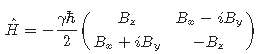

El valor experimental de γ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

Verifique que H es hermítica.
Encuentre los niveles de energía permitidos.
Determine los autovectores y verifique su normalización.

In [5]:
from numpy.linalg import eig, norm

# --------- Parámetros ---------
hbar = 1.054571817e-34    # J·s
mu_B = 9.2740100783e-24   # J/T (Bohr magneton)
g = 2.0                   # g-factor experimental (aprox. 2 para electrón)
# Nota: en el enunciado γ aparece como 2; en física real γ = g*mu_B/hbar (rad/s/T).
# Aquí haremos ambas interpretaciones.

# Campo magnético: 1 gauss en z
B_gauss = 1.0
B = np.array([0.0, 0.0, B_gauss * 1e-4])  # en Tesla (1 G = 1e-4 T)

# Si en el enunciado usan gamma numérico = 2 (sin unidades), interpretaremos
gamma_given = 2.0

# Construcción del Hamiltoniano H = -(gamma * hbar / 2) * (B_x sigma_x + B_y sigma_y + B_z sigma_z)
sigma_x = np.array([[0, 1],[1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j],[1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0],[0, -1]], dtype=complex)

# Forma general H (símbolo gamma_given como en el enunciado)
H_general = - (gamma_given * hbar / 2.0) * (B[0]*sigma_x + B[1]*sigma_y + B[2]*sigma_z)

# Verificar hermiticidad
is_hermitian = np.allclose(H_general.conj().T, H_general)
print("¿H es hermítica (con gamma=2 y B en T)?", is_hermitian)

# Autovalores y autovectores (numéricos)
eigvals, eigvecs = eig(H_general)
# Ordeno autovalores para legibilidad (mayor a menor)
idx = np.argsort(eigvals.real)  # orden por parte real
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("\nAutovalores (J):")
for i, val in enumerate(eigvals):
    print(f"  λ_{i} = {val:.4e} J")

print("\nAutovectores (columnas), sin normalizar explícitamente (complex):\n", eigvecs)

# Normalización y verificación ortonormalidad
# NumPy eig devuelve autovectores normalizados en la norma 2, pero comprobemos:
for i in range(eigvecs.shape[1]):
    v = eigvecs[:, i]
    nrm = norm(v)
    print(f"Norma autovector {i}: {nrm:.12f}")

# Comprobación de ortogonalidad (producto interno)
print("\nMatriz de productos internos (v_i^† v_j):")
inner = np.conj(eigvecs.T) @ eigvecs
print(np.round(inner, decimals=6))

# --------- Interpretación física usando g*mu_B (forma usual) ----------
# Para comparar con la física usual: energías E = +/- (g * mu_B * B_z) / 2
Bz = B[2]
E_plus =  (g * mu_B * Bz) / 2.0   # energía para m_s = +1/2 (con signo)
E_minus = - (g * mu_B * Bz) / 2.0
DeltaE = E_plus - E_minus  # = g * mu_B * Bz

print("\nInterpretación física (energías usando g * mu_B):")
print(f"  E(+1/2) = {E_plus:.4e} J  = {E_plus/1.602176634e-19:.4e} eV")
print(f"  E(-1/2) = {E_minus:.4e} J = {E_minus/1.602176634e-19:.4e} eV")
print(f"  Separación ΔE = {DeltaE:.4e} J = {DeltaE/1.602176634e-19:.4e} eV")

# Para comparar con H_general: calculemos autovalores con la constante γ_phys = g*mu_B/hbar
gamma_phys = g * mu_B / hbar
H_phys = - (gamma_phys * hbar / 2.0) * (B[0]*sigma_x + B[1]*sigma_y + B[2]*sigma_z)
# simplifica: H_phys = - (g mu_B / 2) * (B · sigma); sus autovalores deben ser +/- g mu_B B / 2
eigvals_phys, eigvecs_phys = eig(H_phys)
eigvals_phys = np.sort(eigvals_phys.real)
print("\nAutovalores de H construido con γ_phys = g μ_B / ħ (J):")
print(eigvals_phys)
print("Estos coinciden con ± g μ_B B / 2 (ver arriba).")

¿H es hermítica (con gamma=2 y B en T)? True

Autovalores (J):
  λ_0 = -1.0546e-38+0.0000e+00j J
  λ_1 = 1.0546e-38-0.0000e+00j J

Autovectores (columnas), sin normalizar explícitamente (complex):
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Norma autovector 0: 1.000000000000
Norma autovector 1: 1.000000000000

Matriz de productos internos (v_i^† v_j):
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Interpretación física (energías usando g * mu_B):
  E(+1/2) = 9.2740e-28 J  = 5.7884e-09 eV
  E(-1/2) = -9.2740e-28 J = -5.7884e-09 eV
  Separación ΔE = 1.8548e-27 J = 1.1577e-08 eV

Autovalores de H construido con γ_phys = g μ_B / ħ (J):
[-9.27401008e-28  9.27401008e-28]
Estos coinciden con ± g μ_B B / 2 (ver arriba).


5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

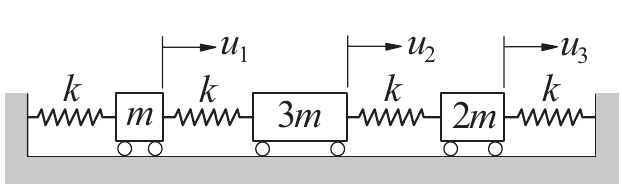

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

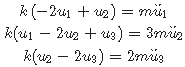

donde:
ui(t) representa el desplazamiento de la masa i desde su posición de equilibrio.
k es la constante de los resortes.
m es la masa.
Determinar las frecuencias de vibración (ω) en términos de √(k/m) y las formas modales correspondientes.

In [6]:
# Parámetros simbólicos/escala
# Las frecuencias salen en unidades de sqrt(k/m); puedes fijar k=m=1 para calcular los factores.
k_over_m = 1.0  # luego multiplicas por sqrt(k/m) al final

# Matrices M y K (con m=k=1 para obtener r_i y modos; al final re–escalas)
M = np.diag([1.0, 3.0, 2.0])
K = np.array([[ 2.0, -1.0,  0.0],
              [-1.0,  2.0, -1.0],
              [ 0.0, -1.0,  2.0]])

# Autovalores y autovectores del problema generalizado K phi = (omega^2) M phi
# Equivalente a resolver (M^{-1} K) v = r v, con r = omega^2 * (m/k)
MinvK = np.linalg.solve(M, K)  # M^{-1}K
r, V = np.linalg.eig(MinvK)    # r_i y vectores columna en V

# Ordenar por frecuencia ascendente
idx = np.argsort(r)
r = r[idx].real
V = V[:, idx].real

# Frecuencias en unidades de sqrt(k/m)
omega = np.sqrt(r)  # luego multiplicas por sqrt(k/m) si k,m no son 1

# Normalización modal (masa-normalizada: v^T M v = 1)
V_massnorm = np.zeros_like(V)
for i in range(3):
    v = V[:, i]
    alpha = np.sqrt(v.T @ M @ v)
    V_massnorm[:, i] = v / alpha

# Escalar cada modo para que su componente de mayor magnitud sea 1 y ajustar signos "bonitos"
V_scaled = V_massnorm.copy()
for i in range(3):
    vmax = np.max(np.abs(V_scaled[:, i]))
    if V_scaled[0, i] < 0:   # opcional: que el primer componente quede positivo
        V_scaled[:, i] *= -1
    V_scaled[:, i] /= vmax

# Mostrar resultados
print("r_i (omega_i^2 * m/k):", r)
print("Frecuencias  omega_i = sqrt(k/m) * sqrt(r_i):")
for i, wi in enumerate(omega, 1):
    print(f"  omega_{i} ≈ {wi:.6f} * sqrt(k/m)")

print("\nFormas modales (columna i → modo i, max|componente|=1):")
print(V_scaled)

r_i (omega_i^2 * m/k): [0.2528215  1.18092053 2.23292464]
Frecuencias  omega_i = sqrt(k/m) * sqrt(r_i):
  omega_1 ≈ 0.502814 * sqrt(k/m)
  omega_2 ≈ 1.086702 * sqrt(k/m)
  omega_3 ≈ 1.494297 * sqrt(k/m)

Formas modales (columna i → modo i, max|componente|=1):
[[ 0.57235137  0.44176551  1.        ]
 [ 1.          0.36184106 -0.23292464]
 [ 0.66918414 -1.          0.09446021]]
